<a href="https://colab.research.google.com/github/Elimirage/digital_image_processing_24vvim1/blob/main/lab5/lab5_yumaeva.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [317]:
%matplotlib inline
import matplotlib.pyplot as plt
import cv2 as cv
import numpy as np
from matplotlib import colors
from matplotlib.colors import hsv_to_rgb

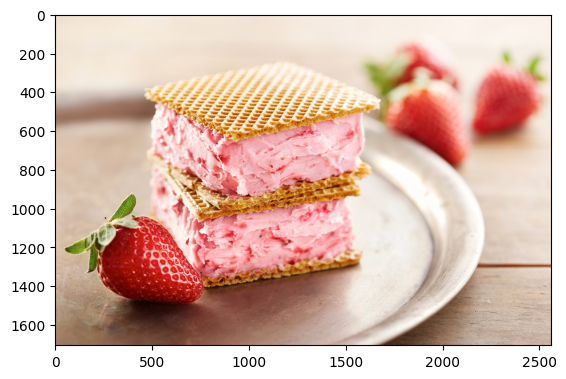

In [318]:
image = cv.imread('/content/K47ZVgPhnc2pL5Ph9oDQwXiYSFkjyNhZaJ8YfOWuLBoA5NVgCp3zV1DSc00EwT-v0pgjecCri9QCBw326g_3mrWR.jpg')
image_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)
plt.imshow(image_rgb)
plt.show()

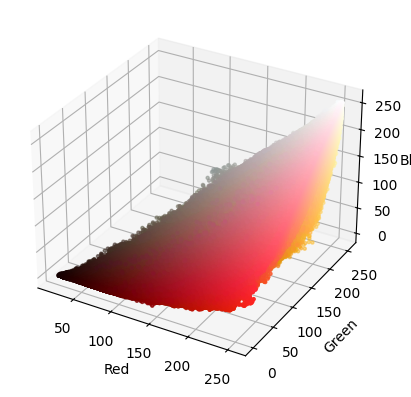

In [319]:
r, g, b = cv.split(image_rgb)
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")
pixel_colors = image_rgb.reshape((np.shape(image_rgb)[0]*np.shape(image_rgb)[1], 3))
norm = colors.Normalize(vmin=-1.,vmax=1.)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()
axis.scatter(r.flatten(), g.flatten(), b.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Red")
axis.set_ylabel("Green")
axis.set_zlabel("Blue")
plt.show()

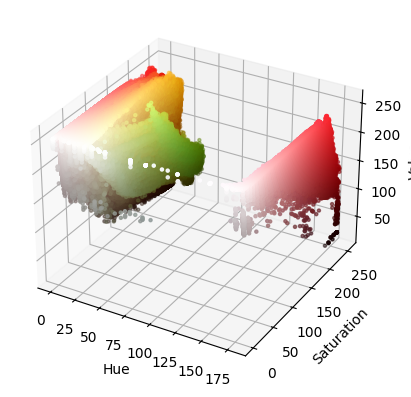

In [320]:
image_hsv = cv.cvtColor(image_rgb, cv.COLOR_RGB2HSV)
h, s, v = cv.split(image_hsv)
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")

axis.scatter(h.flatten(), s.flatten(), v.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Hue")
axis.set_ylabel("Saturation")
axis.set_zlabel("Value")
plt.show()

In [321]:
def segment_image(image):

    # Convert the image into HSV
    hsv_image = cv.cvtColor(image, cv.COLOR_RGB2HSV)

    # Set the blue range

    lower_green = (22, 50, 0)
    upper_green = (85, 255, 255)

    # Apply the blue mask
    mask = cv.inRange(hsv_image, lower_green, upper_green)

    # Set a white range
    light_red =  (150, 150, 0)
    upper_red =(255, 255, 255)

    # Apply the white mask
    mask_red = cv.inRange(hsv_image, light_red, upper_red)

    lower_red1 = (0, 150, 80)
    upper_red1 = (5, 255, 255)
    mask_red1 = cv.inRange(hsv_image, lower_red1, upper_red1)
    # Combine the two mask
    # Set the blue range
    lower_blue =  (20, 30, 200)
    upper_blue = (27, 80, 255)

    # Apply the blue mask
    mask1 = cv.inRange(hsv_image, lower_blue, upper_blue)

    final_mask = mask + mask_red + mask_red1+mask1
    result = cv.bitwise_and(image, image, mask=final_mask)

    # Clean up the segmentation using a blur
    blur = cv.GaussianBlur(result, (17, 27), 0)


    return blur

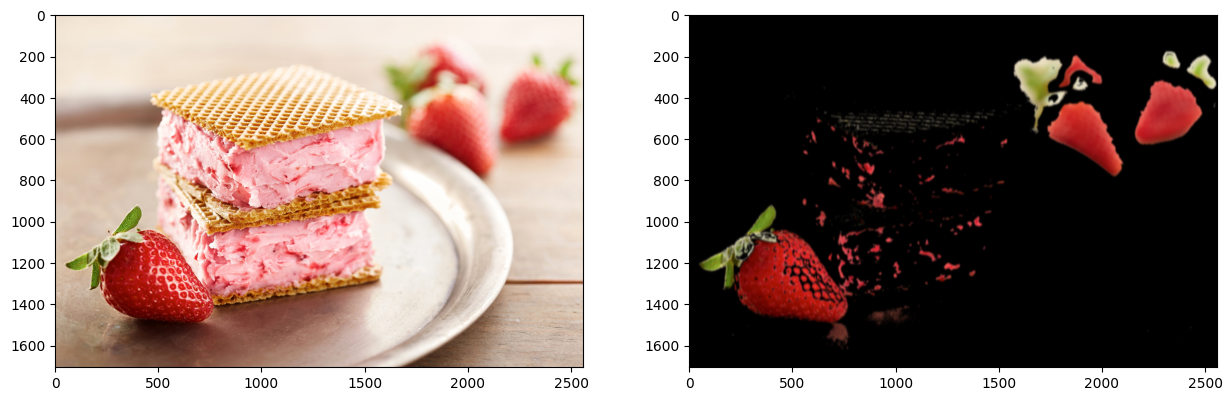

In [322]:
result = segment_image(image_rgb)
plt.figure(figsize=(15,20))
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.subplot(1, 2, 2)
plt.imshow(result)
plt.show()